### Import des modules necéssaires au projet

In [134]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import math
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.tree import DecisionTreeRegressor
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore")

#### Requêtes SQL utilisées pour générer le jeu de données

##### Requête 1 : 

##### Requête 2 : 

##### Requête 3 : 

##### Requête 4 : 

##### Requête 5 : 

##### Requête 6 : 

##### Requête 7 : 

##### Requête 8 : 

### Import des données

In [135]:
file_path_1 = "C:/Users/pdevi/OneDrive/Desktop/OpenClassrooms/Projet_3/DATA/data_main_1.csv"
file_path_2 = "C:/Users/pdevi/OneDrive/Desktop/OpenClassrooms/Projet_3/DATA/data_main_2.csv"
file_path_3 = "C:/Users/pdevi/OneDrive/Desktop/OpenClassrooms/Projet_3/DATA/data_main_3.csv"
file_path_4 = "C:/Users/pdevi/OneDrive/Desktop/OpenClassrooms/Projet_3/DATA/data_main_4.csv"
file_path_5 = "C:/Users/pdevi/OneDrive/Desktop/OpenClassrooms/Projet_3/DATA/data_main_5.csv"
file_path_6 = "C:/Users/pdevi/OneDrive/Desktop/OpenClassrooms/Projet_3/DATA/data_main_6.csv"
file_path_7 = "C:/Users/pdevi/OneDrive/Desktop/OpenClassrooms/Projet_3/DATA/data_main_7.csv"
file_path_8 = "C:/Users/pdevi/OneDrive/Desktop/OpenClassrooms/Projet_3/DATA/data_main_8.csv"

data_1=pd.read_csv(file_path_1)
print(data_1.shape)
data_2=pd.read_csv(file_path_2)
print(data_2.shape)
data_3=pd.read_csv(file_path_3)
print(data_3.shape)
data_4=pd.read_csv(file_path_4)
print(data_4.shape)
data_5=pd.read_csv(file_path_5)
print(data_5.shape)
data_6=pd.read_csv(file_path_6)
print(data_6.shape)
data_7=pd.read_csv(file_path_7)
print(data_7.shape)
data_8=pd.read_csv(file_path_8)
print(data_8.shape)

(96096, 4)
(96096, 2)
(96096, 2)
(95560, 2)
(95420, 2)
(95600, 2)
(95681, 2)
(99498, 3)


#### Combinaison des données : 

Pour bien combiner les données, on veut s'assurer que les valeurs soient assignées au bon client et ce pour chaque ligne et donc on utilise l'indentifiant unique du client soit 'customer_unique_id' pour reconstruire le jeu de données.

In [136]:
# List of dataframes
dataframes = [data_1, data_2, data_3, data_4, data_5,data_6,data_7,data_8]

# Find the dataframe with the smallest number of rows
smallest_df = min(dataframes, key=len)

# Get common customer_unique_id values based on the smallest dataframe
common_ids = set(smallest_df['customer_unique_id'])

# Filter all dataframes to only include rows with customer_unique_id in common_ids
filtered_dataframes = [df[df['customer_unique_id'].isin(common_ids)] for df in dataframes]

# Merge all dataframes on 'customer_unique_id'
data = filtered_dataframes[0]
for df in filtered_dataframes[1:]:
    data = pd.merge(data, df, on='customer_unique_id', how='inner')

In [137]:
data

customer_unique_id  days_since_last_order  \
0      ffffd2657e2aad2907e67c3e9daecbeb             532.883021   
1      ffff5962728ec6157033ef9805bacc48             168.092095   
2      ffff371b4d645b6ecea244b27531430a             617.070162   
3      fffea47cd6d3cc0a88bd621562a9d061             310.890532   
4      fffcf5a5ff07b0908bd4e2dbc735a684             495.853958   
...                                 ...                    ...   
99303  0004aac84e0df4da2b147fca70cf8255             336.905972   
99304  0000f6ccb0745a6a4b88665a16c9f078             369.875428   
99305  0000f46a3911fa3c0805444483337064             585.850868   
99306  0000b849f77a49e4a4ce2b2a4ca5be3f             163.263090   
99307  0000366f3b9a7992bf8c76cfdf3221e2             160.273507   

       average_days_diff  std_dev_days_diff  \
0             532.883021                0.0   
1             168.092095                0.0   
2             617.070162                0.0   
3             310.890532                0.0   
4             495.853958                0.0   
...                  ...                ...   
99303         336.905972                0.0   
99304         369.875428                0.0   
99305         585.850868                0.0   
99306         163.263090                0.0   
99307         160.273507                0.0   

       mean_order_reviews_score_of_given_client  \
0                                           5.0   
1                                           5.0   
2                                           5.0   
3                                           4.0   
4                                           5.0   
...                                         ...   
99303                                       5.0   
99304                                       4.0   
99305                                       3.0   
99306                                       4.0   
99307                                       5.0   

       average_order_price_of_client  non_cancelled_orders_count  \
0                              56.99                           1   
1                             115.00                           1   
2                              89.90                           1   
3                              64.89                           1   
4                             785.00                           1   
...                              ...                         ...   
99303                         180.00                           1   
99304                          25.99                           1   
99305                          69.00                           1   
99306                          18.90                           1   
99307                         129.90                           1   

       total_order_price_of_client customer_state       customer_city  \
0                            56.99             PR         campo largo   
1                           115.00             ES  bom jesus do norte   
2                            89.90             MT               sinop   
3                            64.89             BA    feira de santana   
4                          1570.00             PE             sanharo   
...                            ...            ...                 ...   
99303                       180.00             SP            sorocaba   
99304                        25.99             PA               belem   
99305                        69.00             SC            sao jose   
99306                        18.90             SP              osasco   
99307                       129.90             SP             cajamar   

      payment_type  payment_installments  
0      credit_card                     4  
1      credit_card                     5  
2      credit_card                     1  
3      credit_card                     1  
4      credit_card                    10  
...            ...                   ...  
99303  credit_card                     6  
99304  credi

In [138]:
data['payment_installments']

0         4
1         5
2         1
3         1
4        10
         ..
99303     6
99304     4
99305     8
99306     1
99307     8
Name: payment_installments, Length: 99308, dtype: int64

In [139]:
data.columns

Index(['customer_unique_id', 'days_since_last_order', 'average_days_diff',
       'std_dev_days_diff', 'mean_order_reviews_score_of_given_client',
       'average_order_price_of_client', 'non_cancelled_orders_count',
       'total_order_price_of_client', 'customer_state', 'customer_city',
       'payment_type', 'payment_installments'],
      dtype='object')

Beaucoup de clients n'ont qu'une seule commande, il est donc important de visualiser les nombres de clients dans différentes intervalles de commandes non annulées

In [140]:
# Définir les intervalles de nombre de commandes
bins = [0, 1, 2, 3, 5, 10, 20, 50, 100]
labels = ['0', '1', '2-3', '4-5', '6-10', '11-20', '21-50', '51-100']

# Catégoriser les nombres de commandes dans les intervalles définis
order_intervals = pd.cut(data['non_cancelled_orders_count'], bins=bins, labels=labels, right=False)

# Compter le nombre de clients dans chaque intervalle
customer_counts = order_intervals.value_counts().sort_index()

# Afficher le résultat
print(customer_counts)

non_cancelled_orders_count
0             0
1         94249
2-3        4486
4-5         511
6-10         59
11-20         3
21-50         0
51-100        0
Name: count, dtype: int64


## Retirer les valeurs aberrantes

### Supprimer les clients avec des commandes annulées et aucune commande non annulée

En effet, seuls les vrais clients nous intéressent ici.

In [141]:
import pandas as pd

# Supposons que 'data' est déjà chargé

# Calculer le nombre initial de lignes
initial_rows = data.shape[0]

# Supprimer les clients avec des commandes annulées et aucune commande non annulée
filtered_data = data[~((data['non_cancelled_orders_count'] == 0))]

# Calculer le nombre de lignes après le filtrage
final_rows = filtered_data.shape[0]

# Calculer le nombre de lignes supprimées
rows_removed = initial_rows - final_rows

# Afficher le nombre de lignes supprimées
print(f"Nombre initial de lignes: {initial_rows}")
print(f"Nombre final de lignes: {final_rows}")
print(f"Nombre de lignes supprimées: {rows_removed}")

# Continuer avec les données filtrées
data = filtered_data


Nombre initial de lignes: 99308
Nombre final de lignes: 99308
Nombre de lignes supprimées: 0


#### Retirer les valeurs négatives 

In [142]:
import pandas as pd

# Créer un dictionnaire pour contenir le nombre de valeurs négatives par colonne
negative_counts = {}

# Colonnes à vérifier
colonnes_a_verifier = [
    'non_cancelled_orders_count',
    'days_since_last_order',
    'average_days_diff',
    'std_dev_days_diff',
    'mean_order_reviews_score_of_given_client',
    'average_order_price_of_client',
    'total_order_price_of_client'
]

# Parcourir chaque colonne pour trouver le nombre de valeurs négatives
for colonne in colonnes_a_verifier:
    count = (data[colonne] < 0).sum()
    negative_counts[colonne] = count

# Afficher le nombre de valeurs négatives pour chaque colonne
for colonne, count in negative_counts.items():
    print(f"Valeurs négatives dans {colonne}: {count}")



Valeurs négatives dans non_cancelled_orders_count: 0
Valeurs négatives dans days_since_last_order: 0
Valeurs négatives dans average_days_diff: 0
Valeurs négatives dans std_dev_days_diff: 0
Valeurs négatives dans mean_order_reviews_score_of_given_client: 0
Valeurs négatives dans average_order_price_of_client: 0
Valeurs négatives dans total_order_price_of_client: 0


#### Retirer les valeurs nulles ou négatives

Etant donné que nous avons désormais seulement des clients qui on au moins effectués une seule commande, les valeurs des colonnes average_order_price_of_client et total_price_of_non_cancelled_orders sont necessairement supérieures à zéro, alors si présentes nous supprimons la ligne correspondante :

In [143]:
import pandas as pd

# Nombre initial de lignes dans le jeu de données d'origine
original_count = data.shape[0]

# Définir les conditions à vérifier
condition = (
    (data['average_order_price_of_client'] <= 0) |
    (data['total_order_price_of_client'] <= 0) |
    (data['payment_installments'] <= 0)  # Note: Corrected 'payment_intallments' to 'payment_installments'
)

# Filtrer les lignes qui satisfont à la condition
data= data[~condition]

# Nouveau nombre de lignes après nettoyage
cleaned_count = data_cleaned.shape[0]

# Calculer le nombre de lignes supprimées
rows_removed = original_count - cleaned_count

print("Nombre de lignes supprimées: ", rows_removed)


Nombre de lignes supprimées:  2


In [144]:
# Calculer la proportion de valeurs manquantes pour chaque colonne
missing_values_proportion = data.isna().mean() * 100

# Afficher la proportion de valeurs manquantes par colonne
print("Proportion de valeurs manquantes par colonne (%):")
print(missing_values_proportion)

Proportion de valeurs manquantes par colonne (%):
customer_unique_id                          0.0
days_since_last_order                       0.0
average_days_diff                           0.0
std_dev_days_diff                           0.0
mean_order_reviews_score_of_given_client    0.0
average_order_price_of_client               0.0
non_cancelled_orders_count                  0.0
total_order_price_of_client                 0.0
customer_state                              0.0
customer_city                               0.0
payment_type                                0.0
payment_installments                        0.0
dtype: float64


A ce qu'on peut voir ci-dessus, il n'y a pas de valeurs manquantes dans le jeu de données.

### Feature Engineering

Une grande majorité des clients n'a qu'une seule commande, et environ 3% des clients ont plus d'une seule commande. Cette petite valeur ne sera pas négligeable lorsque nous devrons segmenter les clients en différents groupes.

Puis la distribution de différentes villes de provenances des clients et les transformer leurs valuers en catégories différentes, grande ville, moyenne ville et petite ville ou campagne

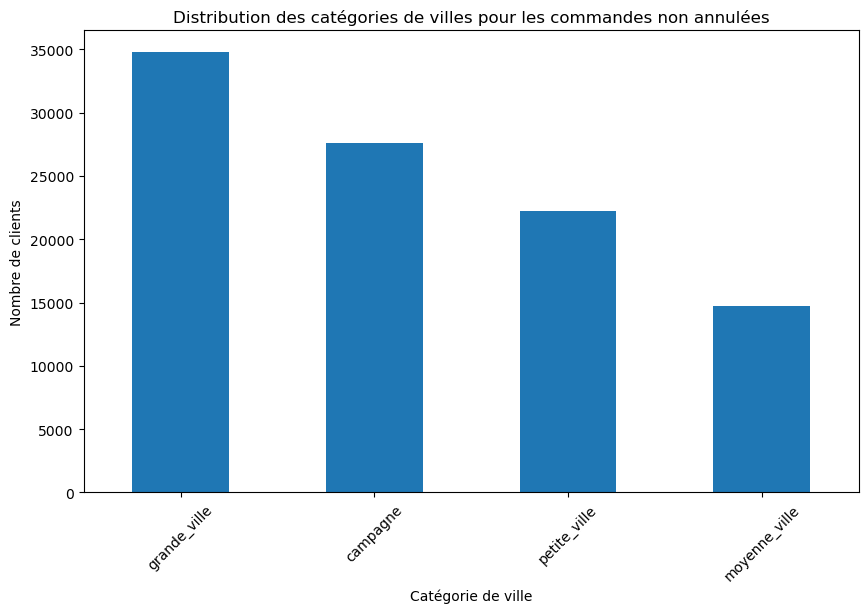

In [145]:
# Compter les occurrences de chaque ville
city_counts = data['customer_city'].value_counts()

# Identifier les catégories de villes
grande_ville = city_counts.nlargest(10).index
moyenne_ville = city_counts.iloc[10:40].index
petite_ville = city_counts.iloc[40:200].index

# Fonction pour transformer les villes en catégories
def categorize_city(city):
    if city in grande_ville:
        return 'grande_ville'
    elif city in moyenne_ville:
        return 'moyenne_ville'
    elif city in petite_ville:
        return 'petite_ville'
    else:
        return 'campagne'

# Appliquer la fonction de transformation
data['customer_city_categorie'] = data['customer_city'].apply(categorize_city)

# Calculer la nouvelle distribution des catégories
city_distribution_transformed = data['customer_city_categorie'].value_counts()

# Visualisation de la distribution transformée
plt.figure(figsize=(10, 6))
city_distribution_transformed.plot(kind='bar')
plt.title('Distribution des catégories de villes pour les commandes non annulées')
plt.xlabel('Catégorie de ville')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=45)
plt.show()

Puis la distribution de différents états des clients et les transformer leurs valeurs des états peu peuplés en commandes en valuer "autre état"

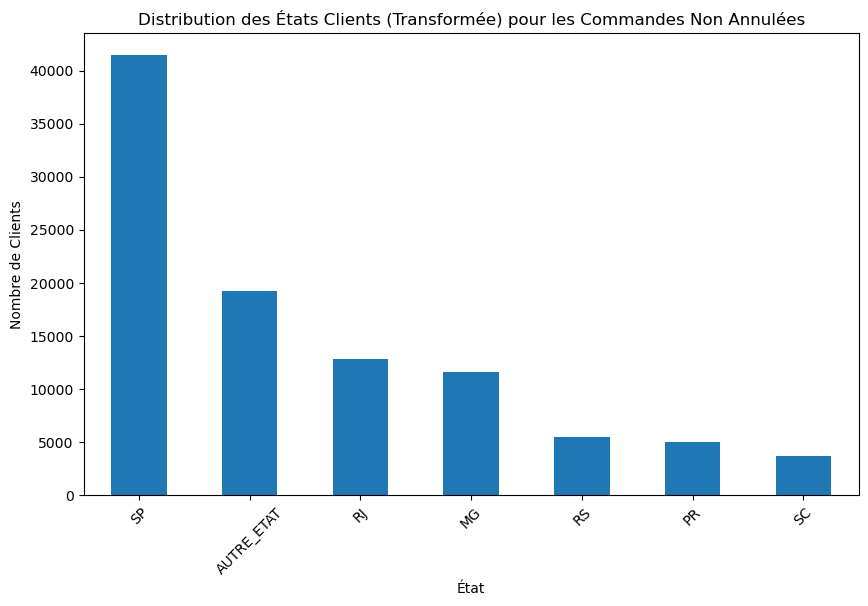

In [146]:
# Compter les occurrences de chaque état
state_counts = data['customer_state'].value_counts()

# Identifier les six états les plus fréquents
top_6_states = state_counts.nlargest(6).index

# Fonction pour transformer les états en "autres états" si pas dans les top 6
def transform_state(state):
    if state in top_6_states:
        return state
    else:
        return 'AUTRE_ETAT'

# Appliquer la fonction de transformation
data['customer_state_categorie'] = data['customer_state'].apply(transform_state)

# Calculer la nouvelle distribution des états
state_distribution_transformed = data['customer_state_categorie'].value_counts()

# Visualisation de la distribution transformée
plt.figure(figsize=(10, 6))
state_distribution_transformed.plot(kind='bar')
plt.title('Distribution des États Clients (Transformée) pour les Commandes Non Annulées')
plt.xlabel('État')
plt.ylabel('Nombre de Clients')
plt.xticks(rotation=45)
plt.show()


Puis la distribution de différents types de paiement des clients et transfoirmation des variables pour ne garder que quelques catégories

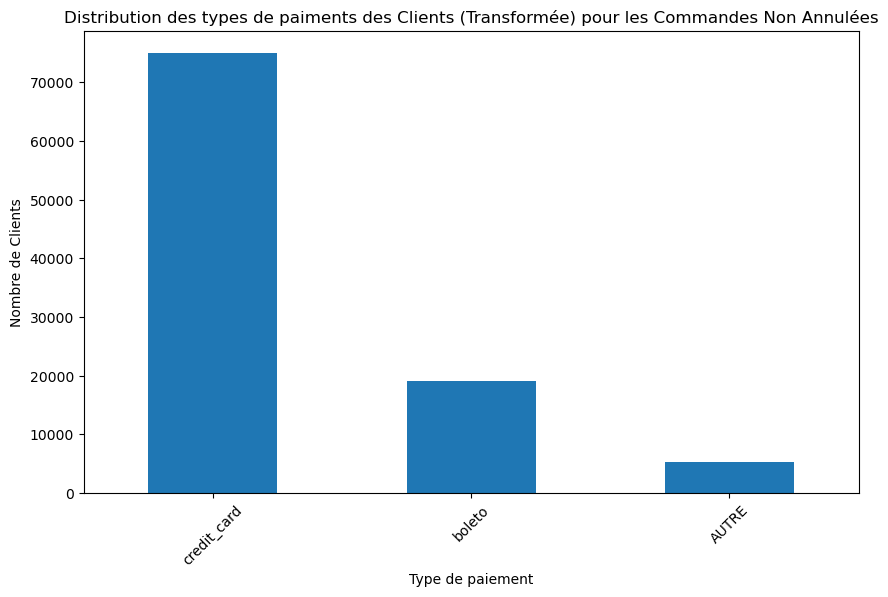

In [147]:
# Compter les occurrences de chaque état
types_counts = data['payment_type'].value_counts()

# Identifier les six états les plus fréquents
top_2_payment_types = types_counts.nlargest(2).index

# Fonction pour transformer les états en "autres états" si pas dans les top 6
def transform_state(state):
    if state in top_2_payment_types:
        return state
    else:
        return 'AUTRE'

# Appliquer la fonction de transformation
data['payment_type'] = data['payment_type'].apply(transform_state)

# Calculer la nouvelle distribution des états
state_distribution_transformed = data['payment_type'].value_counts()

# Visualisation de la distribution transformée
plt.figure(figsize=(10, 6))
state_distribution_transformed.plot(kind='bar')
plt.title('Distribution des types de paiments des Clients (Transformée) pour les Commandes Non Annulées')
plt.xlabel('Type de paiement')
plt.ylabel('Nombre de Clients')
plt.xticks(rotation=45)
plt.show()


Puis la distribution du nombre de paiements des clients pour une commande, et transformation des valeurs en variable catégorielle binaire : un paiement ou plusieurs

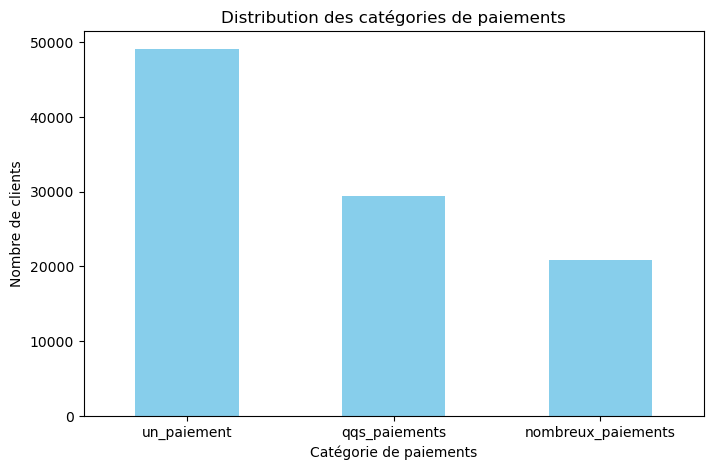

In [148]:
# Compter les occurrences de chaque valeur de payment_installments
installments_counts = data['payment_installments'].value_counts()



# Fonction pour transformer les paiements en catégories
def categorize_installments(installments):
    if installments ==1 :
        return 'un_paiement'
    elif installments <=4 and installments >= 2:
        return 'qqs_paiements'
    else:
        return 'nombreux_paiements'

# Appliquer la fonction de transformation
data['installments_category'] = data['payment_installments'].apply(categorize_installments)

# Calculer la nouvelle distribution des catégories
installments_distribution_transformed = data['installments_category'].value_counts()

# Visualisation de la distribution transformée
plt.figure(figsize=(8, 5))
installments_distribution_transformed.plot(kind='bar', color='skyblue')
plt.title('Distribution des catégories de paiements')
plt.xlabel('Catégorie de paiements')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=0)
plt.show()

Nous avons désormais un jeu de données traité et nettoyé que nous pouvons utiliser sereinement pour la segmentation.

In [149]:
# Définir le chemin de sauvegarde
save_path = r"C:\Users\pdevi\OneDrive\Desktop\OpenClassrooms\Projet_3\DATA_LAST\data_cleaned_0.csv"

# Sauvegarder le DataFrame au format CSV
data.to_csv(save_path, index=False)

print(f"DataFrame saved to {save_path}")

DataFrame saved to C:\Users\pdevi\OneDrive\Desktop\OpenClassrooms\Projet_3\DATA_LAST\data_cleaned_0.csv
